The question requires us to identify the necessary factors that lead to employee attrition and to finally predict the 'Attrition' from the dataset.

We divided the problem into different parts:


*  Visualization of the data
*  Identifying different relationships in the data
*  Selecting the different features that are relevant for the prediction of Attrition
*  Pre-processing data (scaling, encoding categorical variables)
*  Separating dataset into test and train sets
*  Oversampling by SMOTE (as the 'Attrition' isnt a balanced variable)
*  Exploring different classification algorithms
*  Hyperparameter tuning
*  Calculating different metrics (F1, Precision, Accuracy, Recall, etc)
*  Comparing different models
*  Providing import features for the best model

NOTE: For best results, run all the cells sequentially as some cells depend on results from previous cells.


# LOADING AND CHECKING THE DATASET

First we load the data from a github repo that we created and uploaded the data to.
Then we check for any missing values, and separate the dataset into categorical and numerical parts. This will aid in further preprocessing and feature selection

In [0]:
import numpy as np
import pandas as pd

# This part is done to prevent appearance of any future warnings that are generally the case with sci-kit learn libraries
# Import warnings filter
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Loading the dataset
# NOTE: The second dataset is used in plotting pairplots later
ibm_data = pd.read_csv("https://raw.githubusercontent.com/aceking007/MLproject/master/employeeattritionIBM.csv")
ibm_data2 = pd.read_csv("https://raw.githubusercontent.com/aceking007/MLproject/master/employeeattritionIBM.csv")

# Printing the first five rows of the dataset
print (ibm_data.head())

# Checking for missing values
print (ibm_data.isnull().any())

# Checking the structure and datatypes of columns in dataset
print (ibm_data.dtypes)

# Converting Attrition to numerical values (in dataset 1)
Num_val = {'Yes':1, 'No':0}
ibm_data['Attrition'] = ibm_data["Attrition"].apply(lambda x: Num_val[x])
ibm_data.head()

# Separating the dataset into numeric and categorical datasets
numerical = ['Age','DailyRate','DistanceFromHome','Education',
'EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
categorical = ['Attrition','BusinessTravel','Department','EducationField',
'Gender','JobRole','MaritalStatus','Over18','OverTime']
ibm_data_cat = ibm_data[categorical]
ibm_data_num = ibm_data[numerical]

# Printing the first five rows to see if everything worked out
print (ibm_data_cat.head())
print (ibm_data_num.head())

   Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction          

# DATA VISUALIZATION

Matplotlib and Seaborn libraries are used to visualize the data
We plotted the following and then drew conclusions from them:
* Count and Violin plots for categorical data
* Correlation matrix for the numerical values (Numerical Attrition was also included in the dataset)
* Distribution of correlation values to decide upon a threshold for highly correlated values
* Pairplots were also plotted to see the differnet relationships in the numerical dataset (Here the second data, ibm_data2, is used as pairplot requires the hue variable to be string datatype)

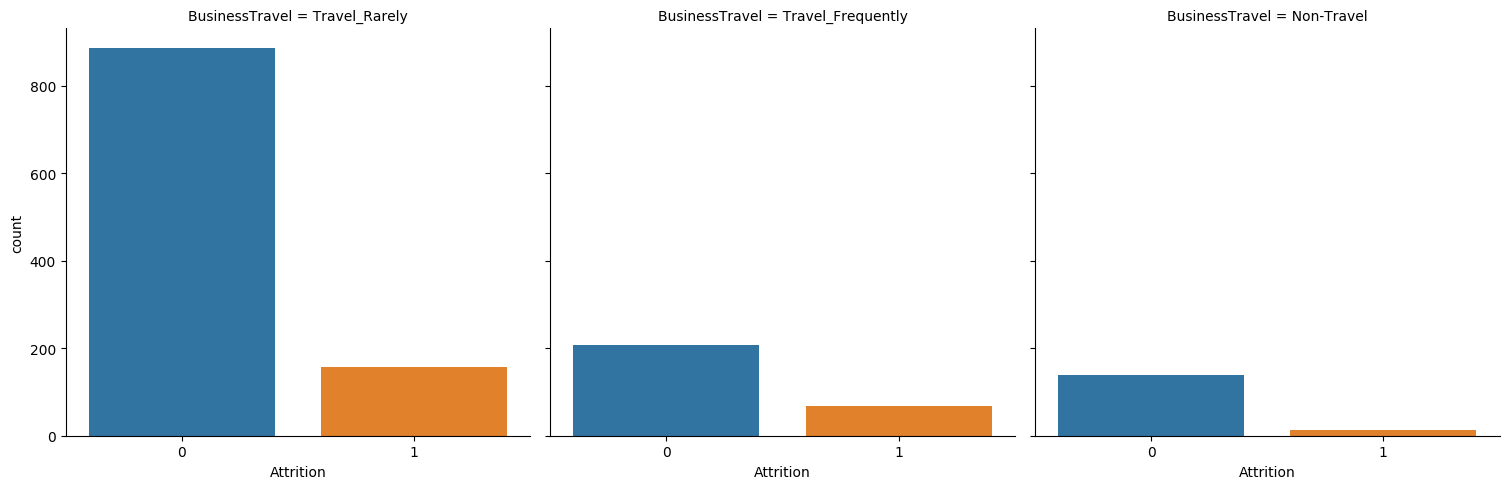

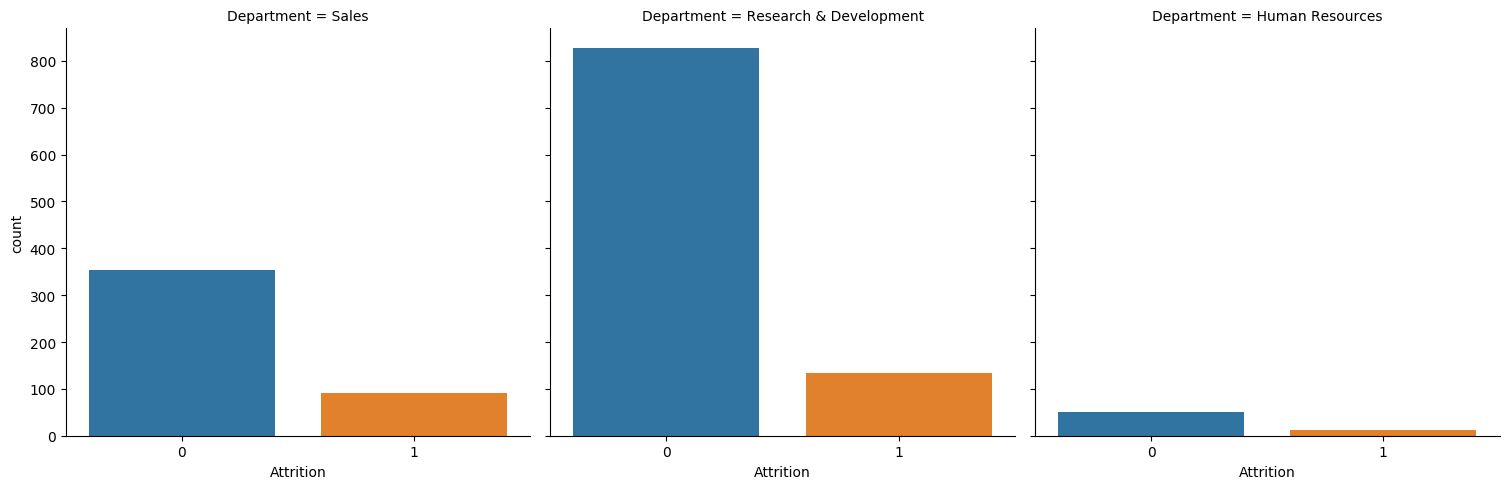

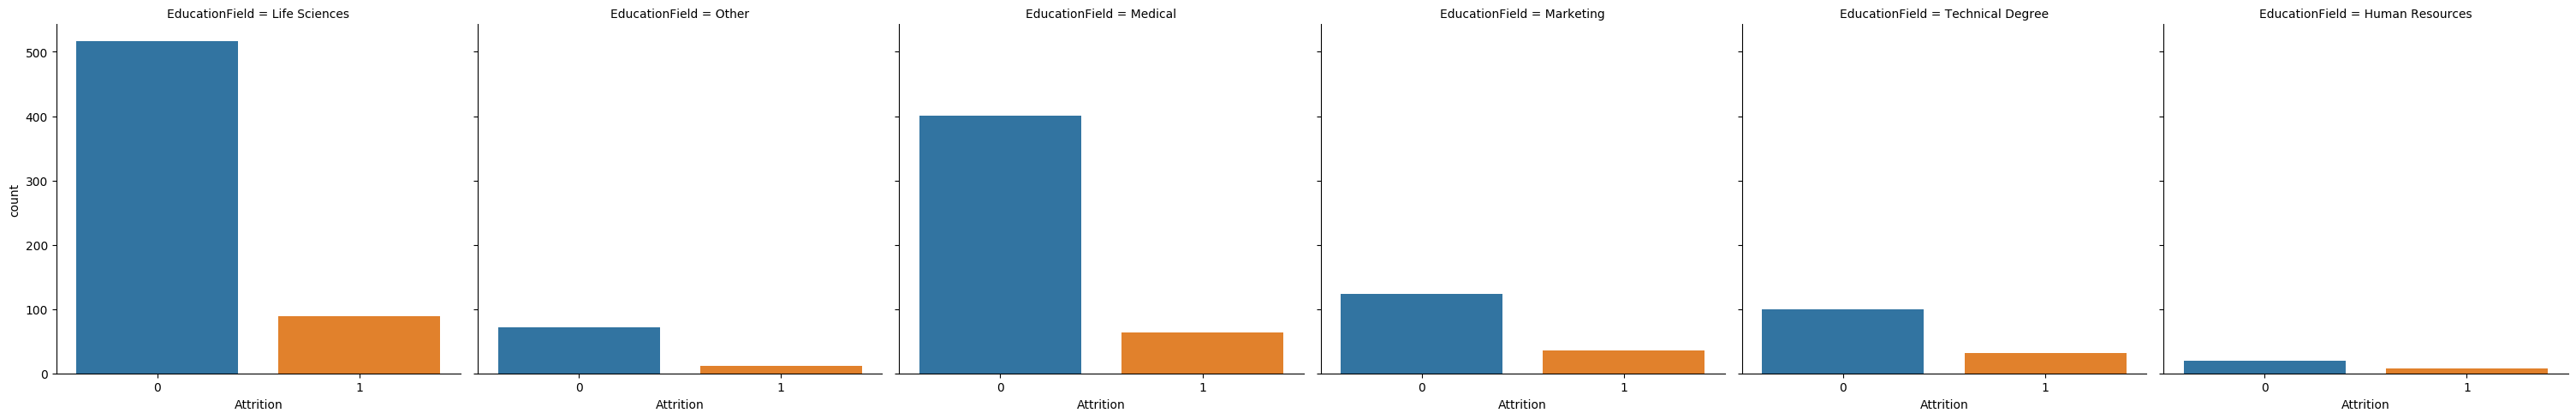

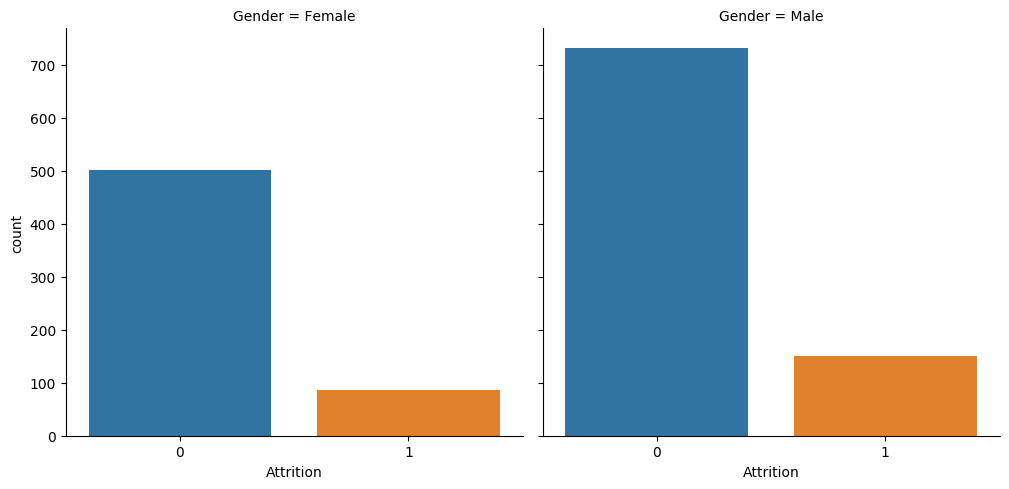

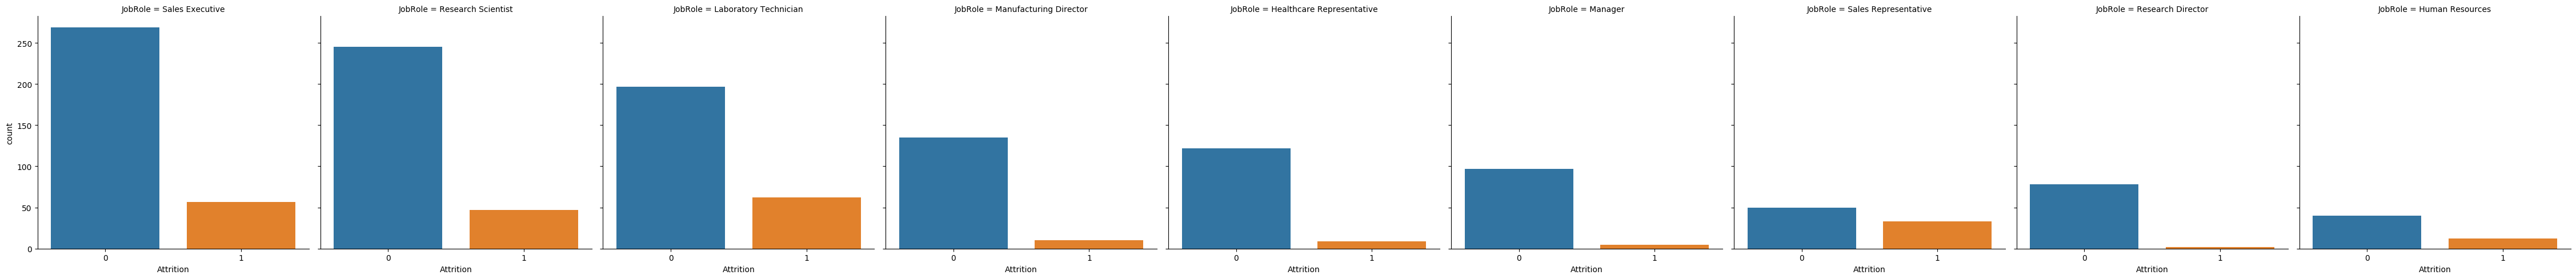

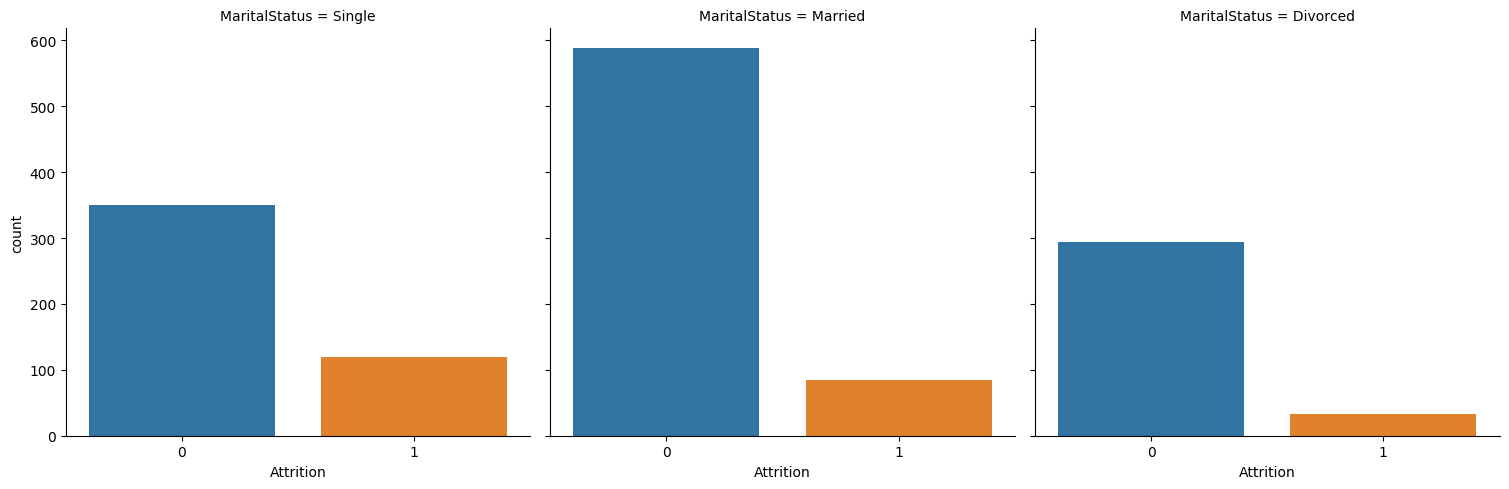

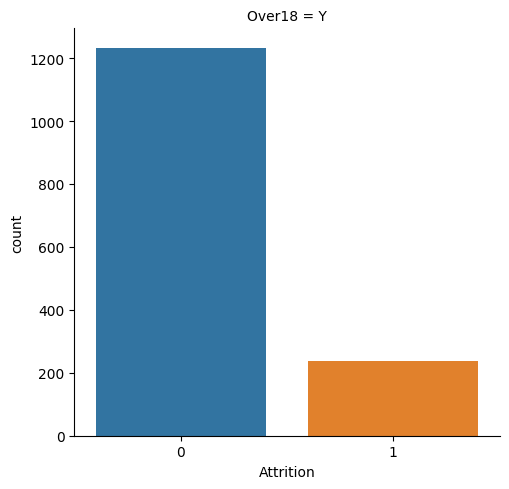

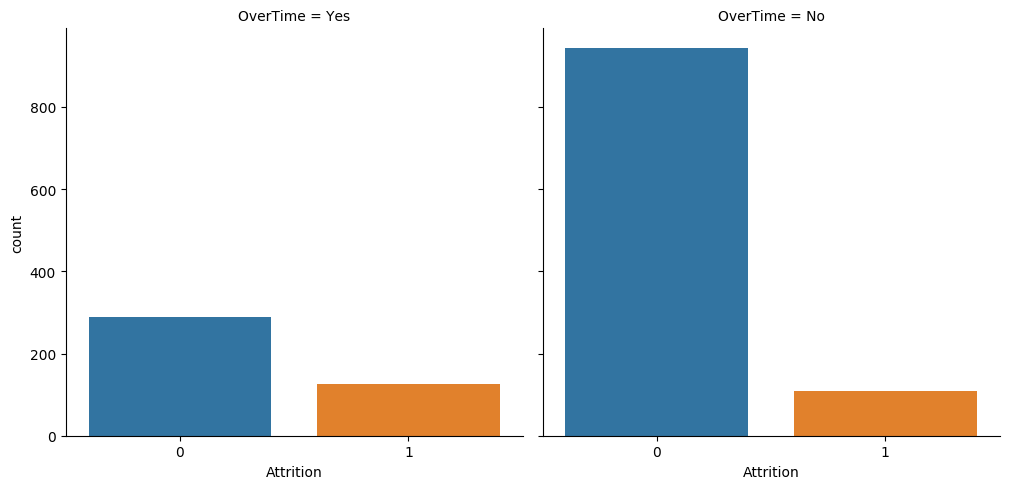

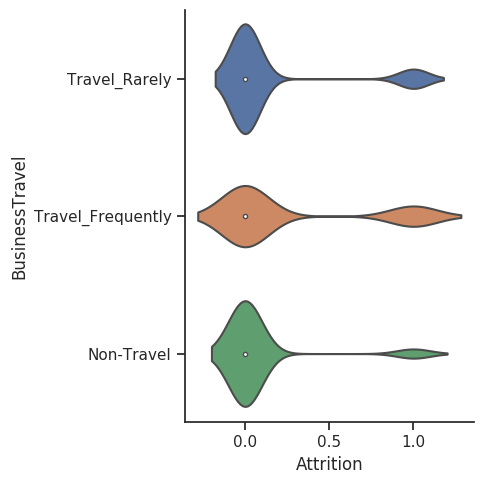

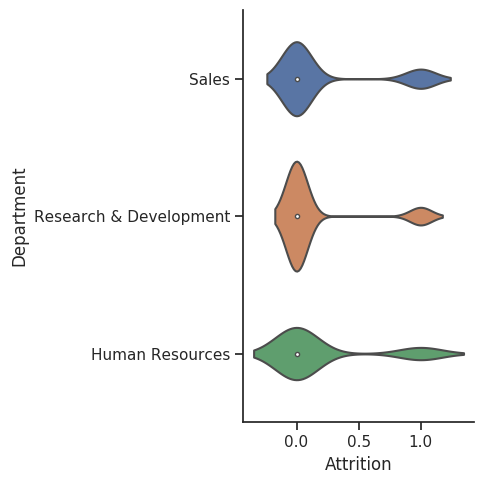

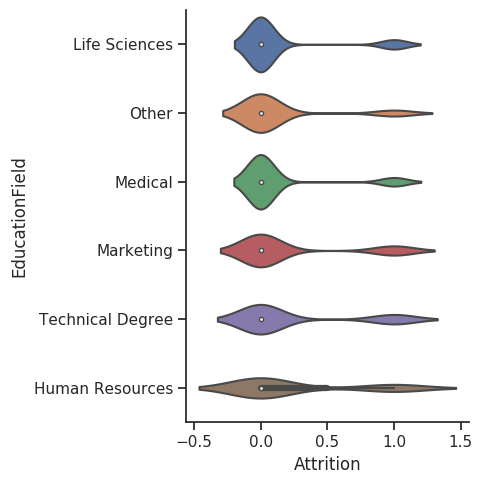

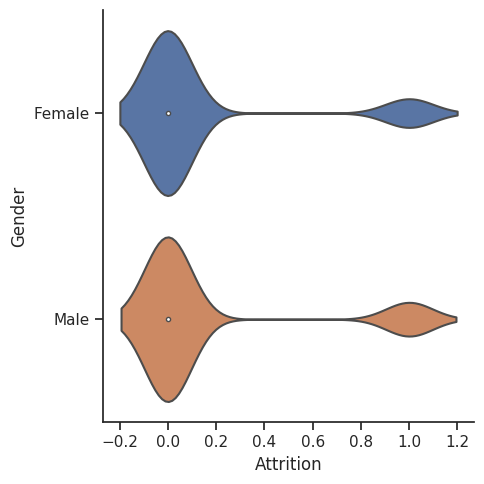

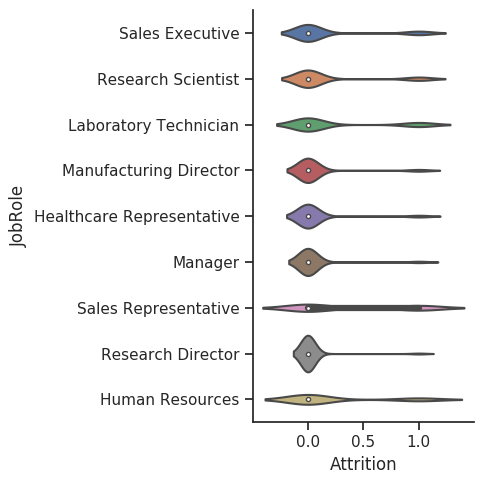

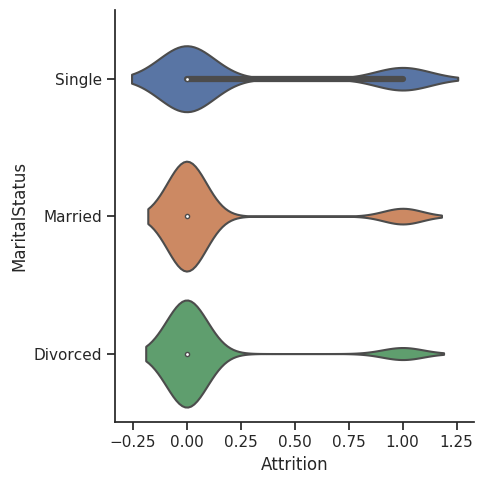

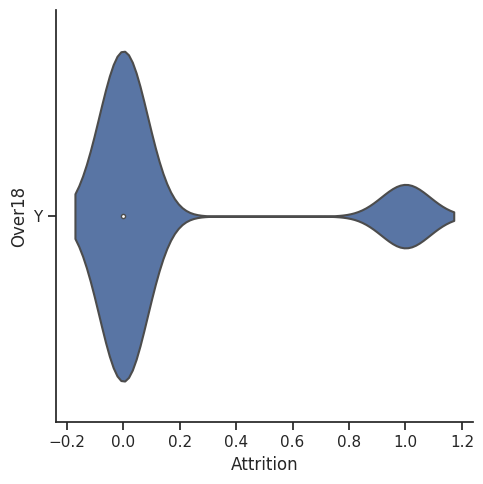

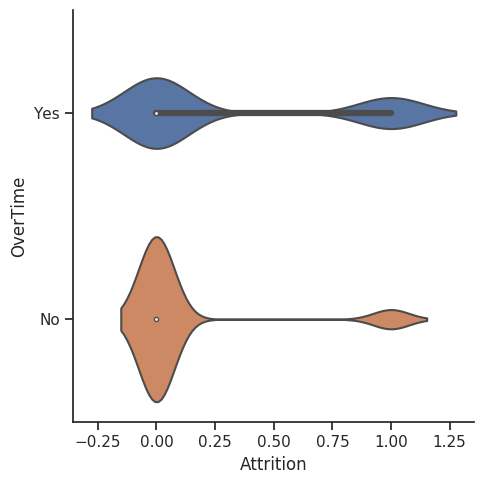

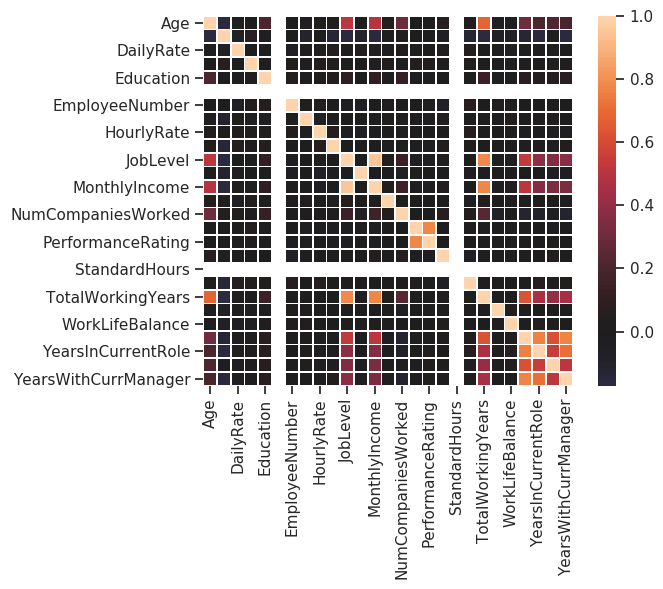

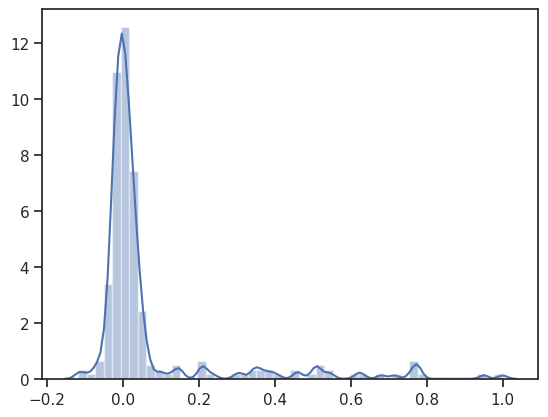

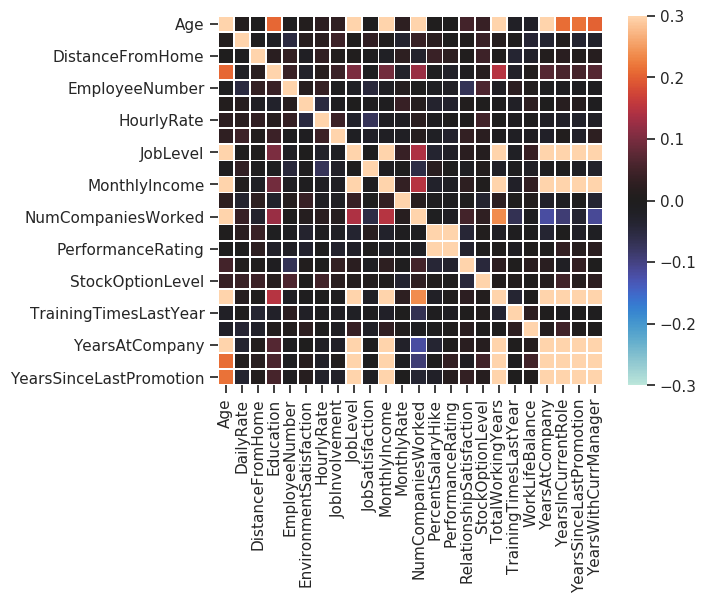

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting all the categorical variables one on one with attrition to see their effect on attrition
# Count and Violin plots were chosen from a range of different plots as they were easier to visualize changes in data
# Count plots
for i in categorical:
    if i != 'Attrition':
        sns.catplot(data=ibm_data, x='Attrition', col=i, kind='count')
plt.show()
# Violin plots
sns.set(style="ticks")
for i in categorical:
    if i != 'Attrition':
        sns.catplot(data=ibm_data, x='Attrition', y=i,kind="violin")
plt.show()

# Plotting the correlation matrix using seaborn
# Computing the correlation matrix for all the numeric data
num_corr = ibm_data_num.corr()
corr = ibm_data.corr()
# Set up the matplotlib figure
f, ax = plt.subplots()
# Drawing the correlation matrix
sns.heatmap(corr,center=0, square=True, linewidths=.5)
# Limit correction and plotting for matplotlib 3.1.1 (this is a bug that needs to be fixed in matplotlib 3.1.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Plotting the distribution of the values in the correlation matrix
p=set()
for i in num_corr:
  a=num_corr[i]
  for j in a:
      # print (j)
      p.add(j)
q = list(p)
sns.distplot(q)

# The second correlation matrix with max and min values of 0.3
# Set up the matplotlib figure
f, ax = plt.subplots()
# Drawing the correlation matrix
sns.heatmap(num_corr,vmin=-0.3, vmax=0.3,center=0, square=True, linewidths=.5)
# Limit correction and plotting for matplotlib 3.1.1 (this is a bug that needs to be fixed in matplotlib 3.1.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


In [0]:
# Pairplot of all the numerical values
# This is done in a different code block as it takes a lot of time for execution
# The happy thing is it is just a kind of test thing and is required for visualization, thus it can be left out
'''
prplt = ['Age','Attrition','DailyRate','DistanceFromHome','Education',
'EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
sns.pairplot(data=ibm_data2[prplt], hue = 'Attrition')
plt.show()
print('Fitting a regression line to find relationships')
sns.pairplot(data=ibm_data2[prplt], hue = 'Attrition', kind='reg')'''

"\nprplt = ['Age','Attrition','DailyRate','DistanceFromHome','Education',\n'EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',\n'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',\n'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',\n'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',\n'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']\nsns.pairplot(data=ibm_data2[prplt], hue = 'Attrition')\nplt.show()\nprint('Fitting a regression line to find relationships')\nsns.pairplot(data=ibm_data2[prplt], hue = 'Attrition', kind='reg')"

# FEATURE SELECTION

* From the dataset and the plots for categorical values, every feature (column) seems connected in some way or the other to the Attrition except Over 18 year - as it just has one category (one value) for all the employees.
* For the same reason, Standard Working Hours and Employee Count are irrelevant.
* After plotting the distribution of correlation matrix, we saw that 0.3 or higher value of correlation is an indication of very high correlation. Thus, we decided to take 0.3 as the threshold for correlation and take only one column from columns that have correlation higher than 0.3
* Another correlation matrix with max and min values of 0.3 and -0.3 was plotted to find out correlated columns

The following cell shows the features that were chosen for the final data analysis. The categorical values were converted to dummy values and then both the categorical and numerical sets were concatenated to get the final dataset with selected features.

In [0]:
# Final categorical variables
final_categories = ['Attrition','BusinessTravel','Department','EducationField',
'Gender','JobRole','MaritalStatus','OverTime']
final_cat = ibm_data[final_categories]

# Final numerical values
final_numerical = ['Age','DailyRate','DistanceFromHome',
'EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobSatisfaction','MonthlyIncome','MonthlyRate',
'PercentSalaryHike','RelationshipSatisfaction',
'StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
final_num = ibm_data[final_numerical]

# Converting categorical values to dummy values
# NOTE: Attrition was previously converted to a numerical value so the get_dummies wont affect it
# However, it was included in the categorical dataset so that categorical plots could have been made
final_cat = pd.get_dummies(final_cat)
# Printing the dataset to show the changes (first 5 rows)
print(final_cat.head())

# Concatenating all the variables
final_data = pd.concat([final_num,final_cat], axis=1)

# Printing the final dataset to make sure everything is correct (first 5 rows)
print(final_data.head())

   Attrition  BusinessTravel_Non-Travel  ...  OverTime_No  OverTime_Yes
0          1                          0  ...            0             1
1          0                          0  ...            1             0
2          1                          0  ...            0             1
3          0                          0  ...            0             1
4          0                          0  ...            1             0

[5 rows x 29 columns]
   Age  DailyRate  ...  OverTime_No  OverTime_Yes
0   41       1102  ...            0             1
1   49        279  ...            1             0
2   37       1373  ...            0             1
3   33       1392  ...            0             1
4   27        591  ...            1             0

[5 rows x 43 columns]


# DATA SCALING

As we can see above, the different features have very wide ranging values
This proves to be a difficulty for many models like kNN (algorithms that calculate the Euclidean distance between two points at any step)
The features with very high values will then be assigned higher weights in these kinds of algorithms. Thus, it is best practice to normalize/scale the data before use.
In the following cell, we scaled the data using MinMaxScaler function in the preprocessing class of sklearn

In [0]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler is selected which scales the data between 0 to 5
scaler = MinMaxScaler(feature_range =(0,5))
# All columns except Attrition should be scaled
data_col = list(final_data.columns)
data_col.remove('Attrition')
# Actual scaling
for col in data_col:
  final_data[col] = final_data[col].astype(float)
  final_data[[col]] = scaler.fit_transform(final_data[[col]])
# Converting 'Attrition' to float (initially it was int), as all other data is as float, so it makes things easier
final_data['Attrition'] = pd.to_numeric(final_data['Attrition'], downcast='float')
# Checking if everything went well
final_data.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2.738095,3.579098,0.000000,1.666667,4.571429,3.333333,5.000000,1.312270,3.490263,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0
1,3.690476,0.633500,1.250000,3.333333,2.214286,1.666667,1.666667,1.085045,4.580004,4.285714,5.000000,1.666667,2.5,3.333333,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,5.000000,4.428571,1.666667,3.333333,0.284623,0.060630,1.428571,1.666667,0.000000,2.5,3.333333,1.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
3,1.785714,4.617037,0.357143,5.000000,1.857143,3.333333,3.333333,0.500263,4.229070,0.000000,3.333333,0.000000,2.5,3.333333,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
4,1.071429,1.750179,0.178571,0.000000,0.714286,3.333333,1.666667,0.647446,2.918691,0.357143,5.000000,1.666667,2.5,3.333333,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0


# SPLITTING DATA INTO TRAINING AND TESTING DATASETS

Using the train_test_split in model_selection class of sklearn, we split the samples into testing and training datasets. The samples were stratified (to maintain the ratio of samples with attrition that was present in the original dataset). This was done to guarantee a steady number of datapoints for classes with lower representation that can be further used for SMOTE

In [0]:
from sklearn.model_selection import train_test_split

# Stratify argument maintains the ratio of the target variable in the test and train datasets
# A fixed random state is used to replicate the split in all the reruns fo the code
target = final_data['Attrition'].copy()
X_train, X_test, Y_train, Y_test = train_test_split(final_data, target, 
                                                    test_size=0.3,
                                                    random_state = 42,
                                                    stratify=target)
# Printing all the different datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1029, 43)
(1029,)
(441, 43)
(441,)


# SMOTE

Next, we used SMOTE function from the imbalancedlearn module to oversample the datapoints for attrition.

In [0]:
from imblearn.over_sampling import SMOTE

# Before SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0))) 

# Carrying out smote with a seed of 2
sm = SMOTE(random_state = 2) 
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel()) 

# Printing the sshape of the dataset
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape)) 
  
# After SMOTE
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0))) 

Before OverSampling, counts of label '1': 166
Before OverSampling, counts of label '0': 863 

After OverSampling, the shape of train_X: (1726, 43)
After OverSampling, the shape of train_y: (1726,) 

After OverSampling, counts of label '1': 863
After OverSampling, counts of label '0': 863


# CLASSIFICATION ALGORITHMS AND HYPERPARAMETER TUNING


In the codebox below, we have implement a naive classification to just test the model scores with the default parameters.
The models are run by the help of pipeline to streamline the whole process and the model score is calculated by the associated methods of each model

#####################################################################
dtc
Default model score: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       370
         1.0       1.00      1.00      1.00        71

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

confusion matrix= 
 [[370   0]
 [  0  71]]
Model execution time:  0.023138046264648438  seconds
#####################################################################
lr
Default model score: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       370
         1.0       1.00      1.00      1.00        71

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

confusion matrix= 
 [[370   0]
 [  0  71]]
Model 

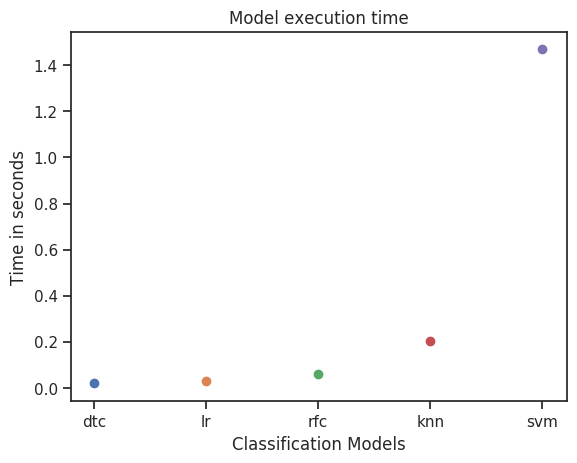

In [0]:
import time
# Importing Pipeline
from sklearn.pipeline import Pipeline
# Importing the necessary models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# List of all the classifiers
classifiers = {
    'dtc':DecisionTreeClassifier(),
    'lr':LogisticRegression(),
    'rfc':RandomForestClassifier(),
    'knn':KNeighborsClassifier(3),
    'svm':SVC(kernel="rbf", C=0.025, probability=True)
}

execution_time = {}

# Main code where everything happens
for classifier in classifiers:
    start_time = time.time()
    pipe = Pipeline(steps=[('classifier', classifiers[classifier])])
    pipe.fit(X_train_res, Y_train_res) 
    print("#####################################################################")  
    print(classifier)
    print("Default model score: %.3f" % pipe.score(X_test, Y_test))
    Y_pred=pipe.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    print("confusion matrix=",'\n',confusion_matrix(Y_test, Y_pred))
    exec_time = time.time() - start_time
    execution_time[classifier] = exec_time
    print("Model execution time: ", exec_time, " seconds")

# Plotting the model execution times
for classifier in classifiers:
    plt.scatter(classifier, execution_time[classifier])
plt.xlabel('Classification Models')
plt.ylabel('Time in seconds')
plt.title('Model execution time')
plt.show()

Next, we use GridSearchCV for Hyperparameter tuning to test if we can increase the model score by changing the different hyperparameters.

#####################################################################
dtc
Best parameters:
{'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'classifier__max_features': 'auto'}
Best Score:  0.9860950173812283
Best Score stdev:  0.017408700150659
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       370
         1.0       0.71      0.70      0.71        71

    accuracy                           0.91       441
   macro avg       0.83      0.83      0.83       441
weighted avg       0.91      0.91      0.91       441

confusion matrix= 
 [[350  20]
 [ 21  50]]
Model training time:  0.8720917701721191  seconds
#####################################################################
lr
Best parameters:
{'classifier__C': 0.01, 'classifier__fit_intercept': True, 'classifier__penalty': 'l1'}
Best Score:  1.0
Best Score stdev:  0.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      

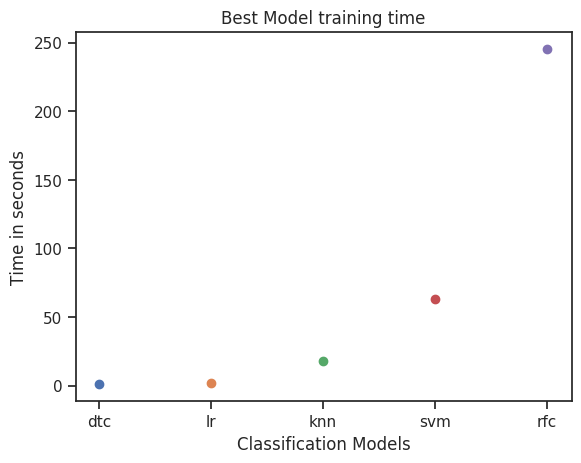

In [0]:
import pandas as pd
import time
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
# Importing the different models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression

# Dictionary of all classifier instances
classifiers = {
    'dtc':DecisionTreeClassifier(),
    'lr':LogisticRegression(),
    'knn':KNeighborsClassifier(),
    'svm':SVC(),
    'rfc':RandomForestClassifier()
}

# Parameters for RandomForest
rfc_param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']
}

# Parameters for KNearestNeighbors
knn_param_grid = {
    'classifier__n_neighbors': [2,3,4,5],
    'classifier__p':[1,2,3]
}

# Parameters for SVM
svm_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__kernel': ['rbf','linear','poly'],
    'classifier__probability': [True,False]
}

# Parameters for DecisionTree
dtc_param_grid = {
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [8,9,10,11,12,13,None],
    'classifier__criterion' :['gini', 'entropy']
}

# Parameters for LogisticRegression
lr_param_grid = {
    'classifier__penalty': ['l1','l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__fit_intercept': [True, False]
}

# Dictionary of all hyperparameters with the model names as keys
param_grid = {'knn':knn_param_grid,
    'svm':svm_param_grid,
    'dtc':dtc_param_grid,
    'rfc':rfc_param_grid,
    'lr':lr_param_grid}

best_parameters = {} # This gets filled and can be used to get the parameters of the best model
results = [] # This gets filled and can be used to generate the boxplot of the best model
tptup = [] # This gets filled with (Y_test, Y_pred) for ROC curve
training_times = {} # This gets filled with the training time of each model and is used later to plot time plots

# Main body where everything happens
for classifier in classifiers:
    k = 5
    rf = Pipeline(steps=[('classifier', classifiers[classifier])])
    CV = GridSearchCV(rf, param_grid[classifier], cv=k)
    print("#####################################################################")
    print(classifier)
    start_time = time.time()  # Starting timer             
    CV.fit(X_train_res, Y_train_res)
    end_time = time.time() # Ending timer
    cv_res = pd.DataFrame(CV.cv_results_)
    cv_res = cv_res.iloc[cv_res['mean_test_score'].argmax()]['split0_test_score':('split%d_test_score' % (k - 1))].values
    results.append(cv_res)
    print('Best parameters:')
    best_parameters[classifier] = CV.best_params_
    print(CV.best_params_) 
    print('Best Score: ', CV.best_score_)
    print('Best Score stdev: ', cv_res.std())
    Y_pred=CV.predict(X_test)
    tptup.append((Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))
    print("confusion matrix=",'\n',confusion_matrix(Y_test, Y_pred))
    training_time = end_time-start_time
    print("Model training time: ", training_time, " seconds")
    training_times[classifier] = training_time

# Plotting the training time for the best model
for classifier in classifiers:
    plt.scatter(classifier, training_times[classifier])
plt.xlabel('Classification Models')
plt.ylabel('Time in seconds')
plt.title('Best Model training time')
plt.show()

# MODEL COMPARISON

We use the running times, ROC curve, and other metrics (model score based on accuracy, precision, recall and f1) along with the confusion matrix to grade the models.

Multiple models show an accuracy of 1.0, so it is necessary to distinguish them from each other.
We have used the training time of the best model (from GridSearch) as a proxy for the simplicity of the decision boundary (assuming less time is required for generation of a simpler decision boundary). We have tested both the training time of the best model and overall execution time of the models.

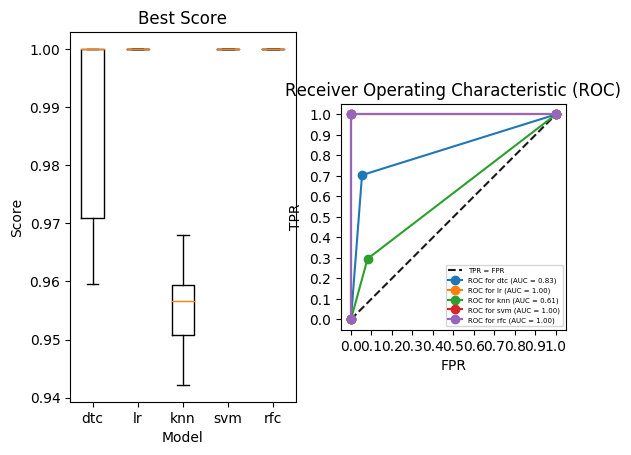

' \nREFERENCES:\nBoxplots:-\n1. https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/\n2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html\n3. https://machinelearningmastery.com/k-fold-cross-validation/\n\nROC Curve:-\n1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py\n2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve\n3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score\n4. https://qiita.com/bmj0114/items/460424c110a8ce22d945\n'

In [0]:
# Boxplot and ROC curve to determine best model
plt.close()
fig = plt.figure()
plt.style.use('default')
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(results)
ax1.set(title = 'Best Score', xticklabels = classifiers.keys(), xlabel = 'Model', ylabel = 'Score') 

from sklearn.metrics import roc_curve, roc_auc_score

ax2 = fig.add_subplot(1,2,2)
ax2.plot([0, 1], [0, 1], '--k', label = 'TPR = FPR')
ax2.set(title = 'Receiver Operating Characteristic (ROC)', xlabel = 'FPR', ylabel = 'TPR', yticks = np.arange(0, 1.1, 0.1), xticks = np.arange(0, 1.1, 0.1))

for i in range(len(classifiers)):
  fpr, tpr, thresh = roc_curve(*tptup[i]) # Returns computed FPR (1 - Specificity) and TPR (Sensitivity) from threshold values (only 3 for a binary decision function)
  roc_auc = roc_auc_score(*tptup[i])  # Returns same value as <auc(fpr, tpr)>, but this version is deprecated
  ax2.plot(fpr, tpr, '-o', label = 'ROC for %s (AUC = %0.2f)' % (list(classifiers.keys())[i], roc_auc))
  plt.legend(fontsize = '5');
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

""" 
REFERENCES:
Boxplots:-
1. https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
3. https://machinelearningmastery.com/k-fold-cross-validation/

ROC Curve:-
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
4. https://qiita.com/bmj0114/items/460424c110a8ce22d945
"""

We can see that on an average the model scores improve after Hyperparameter tuning using GridSearchCV (e.g. KNN, SVM)
We can see that many models (LogisticRegression, RandomForest, SupportVectorMachine) end up giving best scores of 1.0 (100% accuracy). This needs to be tested further to get the best model. If we end up with more than one algorithm that works, we can use the least computationally intensive one for further uses.

The best model in our point of view and the simplest one with high accuracy is Logistic Regression. We also know that it produces a linear decision boundary.

# IMPORTING THE BEST MODEL

In [0]:
import pickle

# Training the best model
model = LogisticRegression(C=0.01, penalty='l1',fit_intercept=True)
model.fit(X_train_res,Y_train_res.ravel())

# Saving model
# The model is saved into a file called best_attrition_model.sav
filename = 'best_attrition_model.sav'
pickle.dump(model, open(filename, 'wb'))
print("Saved model in file")

Saved model in file


We can import the model later from another codebox whenever desired

In [0]:
# Some time later...
 
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred = loaded_model.predict(X_test)
print ("Results")
print(classification_report(Y_test,Y_pred))

Results
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       370
         1.0       1.00      1.00      1.00        71

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

